# DATA 512 : COVID-19 severity relation with patient's pre-existing condition
Divya Pandey

    
<h2>Introduction and Motivation </h2>

I explored how COVID-19 severity is related to patient's medical history / pre-existing conditions to understand if knowledge of patient's medical history can be helpful for hospitals to forecast number of patients who can witness severe outcomes if tested COVID-19 positive and plan for the resources and medical supplies better.


As COVID-19 rapid growth thorughout the world has caused huge spike in demand of hospital supplies and care, hospitals across the world have been struggling greatly with the problem of allocating right resources to the right cases and also forecasting the resources required. It becomes crucial for hospitals to understand every factor that can potentially be utilized in demand forecasting of the resources for COVID patients and be helpful in saving lives. In these circumstances, this information can be proved really useful for hospitals and medical practicioners across teh world and benefit them in planning resources better.

<h2>Background and Related Work</h2>
This article summarizes the condition Mexico government is facing very well - https://www.aa.com.tr/en/latest-on-coronavirus-outbreak/pandemic-reveals-mexicos-social-economic-disparities/2002155 and though there are multiple prediction models which have been made on the dataset to predict if patients with certain pre-conditions are more susceptible to death due to covid, I wish to use this datset for more detailed level study exploring specifically age and pre-existing conditions variables.

<h2>Dataset information</h2>
This dataset is published by Mexican governement and updated on the daily basis. The data includes details about COVID-19 patients in Mexico and contains information such as Age, Gender, data of first covid symptom, date of entry to the hospital, patient's medical history, and whether patient died or recovered. This dataset is published in Spanish language and due to time constraints and lack of Spanish language knowledge, I will be utilizing the dataset that was translated, cleand and published as a Kaggle dataset under the name <i>'COVID-19 patient pre-condition dataset'</i>. The links to Raw Datasource, Cleaned Dataset and Dataset License are below - <br />
<b>Dataset Source :</b> https://www.gob.mx/salud/documentos/datos-abiertos-152127 <br />
<b>Cleaned Dataset Link :</b> https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv <br />
<b>Dataset License :</b> https://creativecommons.org/publicdomain/zero/1.0/ <br />


<h2>Research Questions and Hypothesis</h2>
Some of the questions I want to answer from this datset are - 
<ul>
<li> <i><b>Question 1 - </i></b> Does severity of COVID-19 depends upon the age?</li>
  <ul> <i>Hypothesis - </i> Older people are more prone to death by Covid than people with younger age and severe disease conditions </ul>
<li><i><b>Question 2 - </i></b> Does medical history of COVID-19 patient plays a part in severity of symptoms witnessed?</li>
  <ul> <i>Hypothesis -</i> People with diseases such as diabetes and high blood pressure show symptoms earlier and have higher chances of death  </ul> 
<li><i><b>Question 3 - </i></b> Can patient’s pre-existing conditions data be proven helpful in predicting the severity of cases and hence help hospitals better allocate the resources?</li>
   <ul> <i>Hypothesis - </i> Age, gender , type of medical history can be strong predictors of propensity of death from COVID-19 or requirement of Intubation </ul> 
</ul> 

<h2> Methodology</h2> 
<b>Step 1 - </b> Performing the exploratory data analysis to understand the trends and distribution of rate of death for Age groups and pre-existing conditions in patients. I will then try to investigate how these different age groups were intubated to assess the assignments of medical resources for the pateints. 

<b>Step 2 - </b> Building a logistic regression model to understand the role of age, gender and pre-existing conditions in death due to COVID-19. This will highlight if certain medical history has higher chances of causing a death in patient if infected with COVID-19.

<h2> Analysis</h2>

<h2> Step 1 : Exploratory data analysis to understand the trends and distribution of rate of death for Age groups and pre-existing conditions in patients </h2>

In [2]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns


<h4> Reading the dataset and performing data cleaning</h4>

In [107]:
# Reading the data
covid_df=pd.read_csv("C:/Users/dpandey/Desktop/Stats/Data 512/Final project/covid.csv")
covid_df.head(2)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97


In [108]:
# cleaning the date fields 
covid_df['date_died'] = covid_df['date_died'].replace('9999-99-99', 0)
covid_df['entry_date'] = covid_df['entry_date'].replace('9999-99-99', 0)
covid_df['date_symptoms'] = covid_df['date_symptoms'].replace('9999-99-99', 0)
covid_df['died'] = covid_df['date_died'].apply(lambda x: 'Non-died' if x == 0 else 'Died')
covid_df['died_bool'] = covid_df['date_died'].apply(lambda x: 0 if x == 0 else 1)

# Replacing all binary feilds with intuitive flags 

covid_df.sex.replace({1: 'Female', 2: 'Male'}, inplace=True)
covid_df.patient_type.replace({1: 'Outpatient', 2: 'Inpatient'}, inplace=True)
covid_df.intubed.replace({1: 'Yes', 2: 'No',97:'Not Specified', 98:'Not Specified',99:'Not Specified'}, inplace=True)
covid_df.pregnancy.replace({1: 'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
covid_df.contact_other_covid.replace({1: 'Yes', 2: 'No', 97:'Not Specified',99:'Not Specified',98:'Not Specified'}, inplace=True)
covid_df.covid_res.replace({1: 'Positive', 2: 'Negative', 3:'Awaiting Results'}, inplace=True)
covid_df.icu.replace({1: 'Yes', 2: 'No', 97:'Not Specified',98:'Not Specified', 99:'Not Specified'}, inplace=True)

covid_df.head(3)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,died_bool
0,16169f,Male,Outpatient,04-05-2020,02-05-2020,0,Not Specified,2,27,Not Specified,...,2,2,2,2,2,No,Positive,Not Specified,Non-died,0
1,1009bf,Male,Outpatient,19-03-2020,17-03-2020,0,Not Specified,2,24,Not Specified,...,2,2,2,2,2,Not Specified,Positive,Not Specified,Non-died,0
2,167386,Female,Inpatient,06-04-2020,01-04-2020,0,No,2,54,No,...,2,2,1,2,2,Not Specified,Positive,No,Non-died,0



<h4> 1.) Getting summary statistics to get the count of cases and percentage of cases out of entire population.</h4>
<h4> Findings :</h4>  Out of the 566K patients, almost 40% of the patients tested postive for COVID-19 and Nearly 27k (4.7%) patients died in Mexico City between Apr-Jun 2020

<Figure size 432x432 with 0 Axes>

covid_res         died    
Awaiting Results  Died          2055
                  Non-died     64855
Negative          Died          7000
                  Non-died    272035
Positive          Died         27121
                  Non-died    193536
Name: id, dtype: int64

Negative            0.492471
Positive            0.389439
Awaiting Results    0.118090
Name: covid_res, dtype: float64

<Figure size 432x432 with 0 Axes>

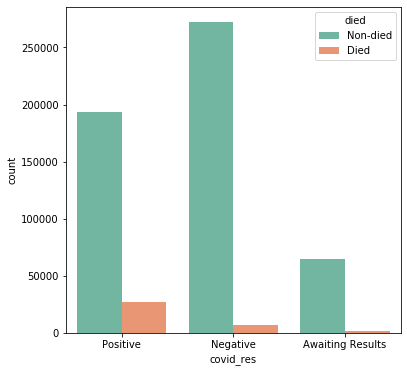

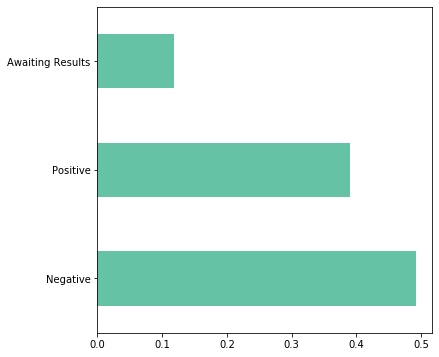

In [201]:
sns.set_palette("Set2")

# Count of patients died/not died per COVID-19 test results

plt.figure(figsize=(6,6))
g=sns.countplot(covid_df['covid_res'],hue=covid_df['died'],palette="Set2")
covid_df.groupby(["covid_res", "died"])["id"].count()
plt.savefig('Count of patients by COVID-19 test results.png')

# Percentage of patients per COVID-19 test results

res=covid_df['covid_res'].value_counts()/sum(covid_df['covid_res'].value_counts())
res
plt.figure(figsize=(6,6))
res.plot(kind='barh',rot=0)
plt.savefig('Percentage of patients by COVID-19 test results.png')


<h4>Plotting the distribution of age for all patients and then for patients who died vs did not die. 
The distribution clearly highilghts the relationship between age and death rate as for population of people who died,
median age is 65 years and is skewed towards older age buckets</h4>

Text(0.5, 1.0, 'Age distribution')

Text(0.5, 1.0, 'Age distribution for the two subpopulations')

Text(0.5, 0.98, 'Covid - 19 test result distribution by age')

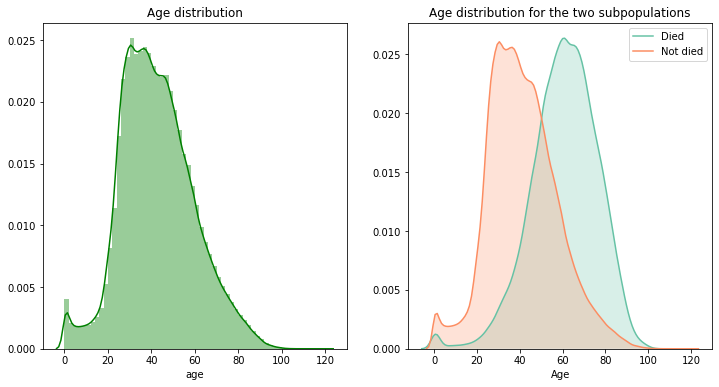

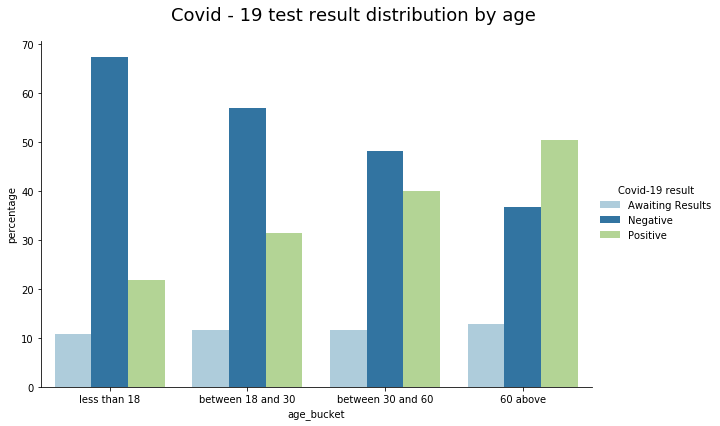

In [199]:
sns.set_palette("Set2")

########################## Histograms of age ###########################
df = covid_df
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
axarr[0].set_title('Age distribution')
f = sns.distplot(df['age'], color='g', bins=60, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')

g = sns.kdeplot(df['age'].loc[df['died'] == 'Died'], 
                shade= True, ax=axarr[1], label='Died').set_xlabel('Age')
g = sns.kdeplot(df['age'].loc[df['died'] == 'Non-died'], 
                shade=True, ax=axarr[1], label='Not died')

fig.savefig('Age_Distribution.png')
########################## Bar plot of cases as per age bucket ###########################
# create a list of our conditions for age bucket
conditions = [
    (covid_df['age'] <= 18),
    (covid_df['age'] > 18) & (covid_df['age'] <= 30),
    (covid_df['age'] > 30) & (covid_df['age'] <= 60),
    (covid_df['age'] > 60)
    ]

# create a list of the values we want to assign for each condition
values = ['less than 18', 'between 18 and 30', 'between 30 and 60', '60 above']

# create a new column and use np.select to assign values to it using our lists as arguments
covid_df['age_bucket'] = np.select(conditions, values)

# Plotting age buckets
sns.set_palette("Paired")

age = covid_df.groupby(["age_bucket", "covid_res"])["id"].count()
res2 = covid_df['age_bucket'].value_counts()
results = age.div(res2, level='age_bucket') * 100
flat_df = results.reset_index(inplace=False)
flat_df.columns=["age_bucket", "Covid-19 result","percentage"]

#sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.catplot(x="age_bucket", y="percentage", hue="Covid-19 result",
                data=flat_df, kind="bar", height=6, aspect=11.7/8.27
               ,order=["less than 18", "between 18 and 30", "between 30 and 60", "60 above"])

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Covid - 19 test result distribution by age", size=18)

fig.savefig('Age_Bucket_Distribution.png')

<h4>Now subsetting data for only COVID-19 positive patients and analyzing if patient's who died from COVID were skewed towards higher age group buckets. <br/>
   I observed that death rate of COVID-19 positive patients was 39% for age group of 60 above which was highest among all age groups. Also, when looking at the distribution of intubation among people of above 60 age group, I observe that out of all people who died above age 60, 75% were not intubated and 80% were not admitted to ICU. This finding suggests that either hospitals did not have suffiecient resources to support the pateints or they sub-optimally assigned the resources</h4>

Text(0.5, 0.98, 'Distribution of Covid 19 positive patients deaths by age')

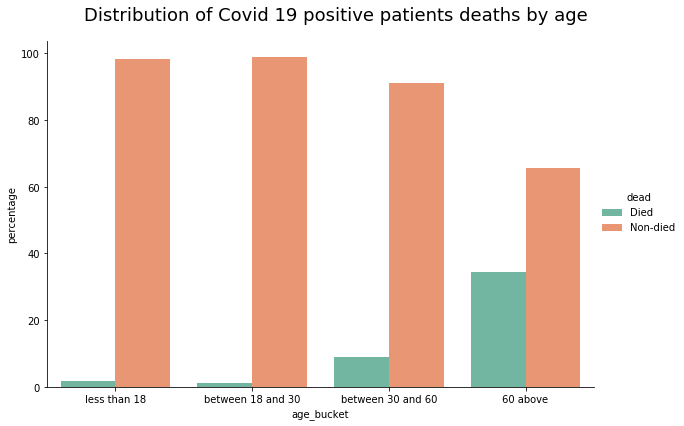

In [202]:
covid_positive = covid_df[covid_df.covid_res == 'Positive']

sns.set_palette("Set2")

# deaths by age group
age2 = covid_positive.groupby(["age_bucket", "died"])["id"].count()
died2 = covid_positive['age_bucket'].value_counts()
results2 = age2.div(died2, level='age_bucket') * 100
flat_df2 = results2.reset_index(inplace=False)
flat_df2.columns=["age_bucket", "dead","percentage"]

#sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.catplot(x="age_bucket", y="percentage", hue="dead", 
                data=flat_df2, kind="bar",height=6, aspect=11.7/8.27
               ,order=["less than 18", "between 18 and 30", "between 30 and 60", "60 above"])
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Covid 19 positive patients deaths by age", size=18)
plt.savefig('Distribution of Covid 19 positive patients deaths by age.png')

Text(0.5, 0.98, 'Distribution of intubation for above 60 years')

Text(0.5, 0.98, 'Distribution of ICU for above 60 years')

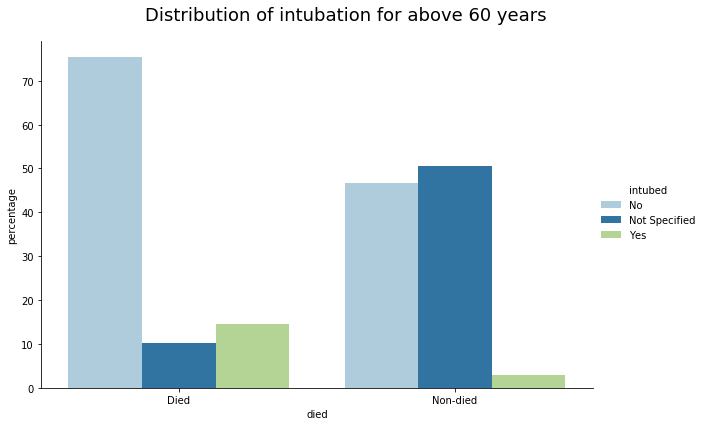

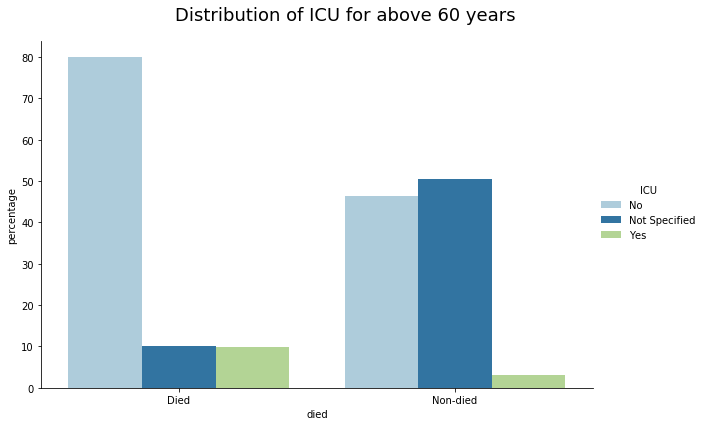

In [203]:
sns.set_palette("Paired")

age_above_sixty = covid_positive[covid_positive.age_bucket == '60 above']

#intubation for abve 60 years
died1 = age_above_sixty.groupby(["died", "intubed"])["id"].count()
intubed = age_above_sixty['died'].value_counts()
results3 = died1.div(intubed, level='died') * 100
flat_df3 = results3.reset_index(inplace=False)
flat_df3.columns=["died", "intubed","percentage"]

#sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.catplot(x="died", y="percentage", hue="intubed", 
                data=flat_df3, kind="bar", height=6, aspect=11.7/8.27)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of intubation for above 60 years", size=18)
plt.savefig('Distribution of intubation for above 60 years.png')


#ICU for abve 60 years
died2 = age_above_sixty.groupby(["died", "icu"])["id"].count()
ICU = age_above_sixty['died'].value_counts()
results4 = died2.div(ICU, level='died') * 100
flat_df4 = results4.reset_index(inplace=False)
flat_df4.columns=["died", "ICU","percentage"]

#sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.catplot(x="died", y="percentage", hue="ICU", 
                data=flat_df4, kind="bar",height=6, aspect=11.7/8.27)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of ICU for above 60 years", size=18)
plt.savefig('Distribution of ICU for above 60 years.png')


<h4> Analyzing the pre-existing condition death rate to find if certain conditions are higher risk prone than others and then seeing the distribution of intubation rate for those.<br/>
I observed that Pneumonia has 55% Death rate, Renal Chronic has 50% Death rate and COPD has 43% Death rate; highest among all COVID-19 patients above 60 years age. <br/>
Also, Pneumonia patients had highest intubation rate, but low intubation rate in Renal Chronic and COPD patients signals opportunity areas in resource planning for specially patients with history of these diseases </h4>


In [204]:

# Creating a function to clean the data for each pre-existing medical condition and calculate the death rate
def med_hist(data,col):
    disease2 = pd.DataFrame()
    
    for i in col:
        df=(data[data[i] == 1].groupby([i,'died'])["id"].count()).reset_index(inplace=False)
        df.columns=["disease","died","count"]
        df.disease = i
        disease2= disease2.append(df)
    
    return disease2
    

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Disease history')

Text(0, 0.5, '%Died')

Text(0.5, 0.98, '%Covid Patient died - Split by disease history')

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Disease history')

Text(0, 0.5, '%Died')

Text(0.5, 0.98, '%Covid Patient died with age above 60 - Split by disease history')

<Figure size 432x288 with 0 Axes>

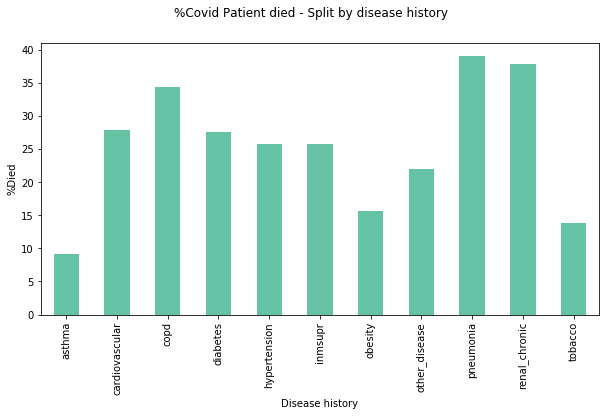

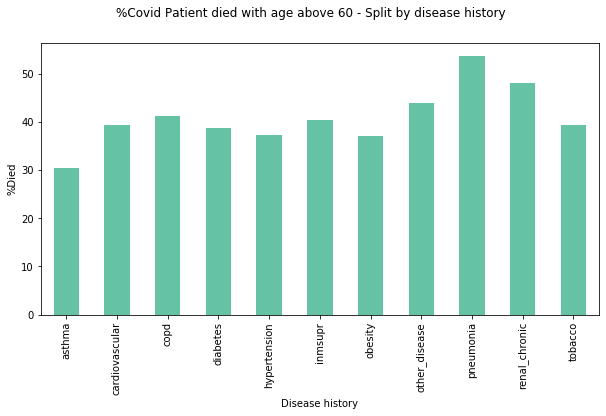

In [206]:
# plotting the death rate by diseases, first for the entire COVID-19 positive population and then for only above age 60.

col = ["asthma","pneumonia","diabetes","copd","inmsupr","hypertension","other_disease"
       ,"cardiovascular","obesity","renal_chronic","tobacco"]

# Calculating the death rate
disease_allage= med_hist(data = covid_positive,col=col)

died = disease_allage[disease_allage.died == "Died"].groupby(['disease'])["count"].sum()
dis = disease_allage.groupby(['disease'])["count"].sum()

disease_60= med_hist(data = age_above_sixty,col=col)

    
died1 = disease_60[disease_60.died == "Died"].groupby(['disease'])["count"].sum()
dis1 = disease_60.groupby(['disease'])["count"].sum()

# Plotting the graphs

sns.set_palette("Set2")

plot1 = plt.figure(1)
plt.figure(figsize=(10,5))
(died.div(dis, level='disease') * 100).plot(x="%Died",y="Historical disease",kind='bar')
plt.xlabel('Disease history')
plt.ylabel('%Died')
plt.suptitle('%Covid Patient died - Split by disease history')
plt.savefig('%Covid Patient died - Split by disease history.png')

plot2 = plt.figure(2)
plt.figure(figsize=(10,5))
(died1.div(dis1, level='disease') * 100).plot(x="%Died",y="Historical disease",kind='bar')
plt.xlabel('Disease history')
plt.ylabel('%Died')
plt.suptitle('%Covid Patient died with age above 60 - Split by disease history')
plt.savefig('%Covid Patient died with age above 60 - Split by disease history.png')


<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Disease history')

Text(0, 0.5, '%Intubed')

Text(0.5, 0.98, '%Covid Patient intubed - Split by disease history')

<Figure size 432x288 with 0 Axes>

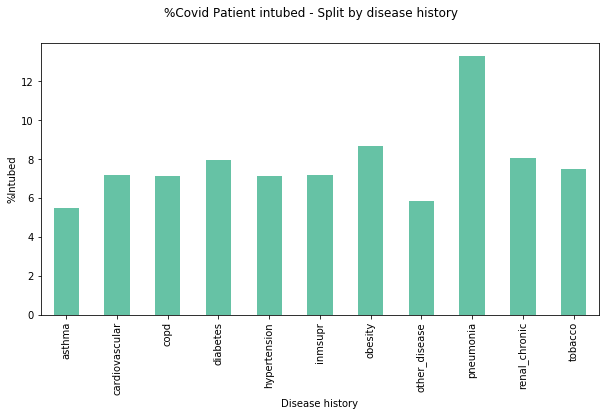

In [127]:
# Creating a function to clean the data for each pre-existing medical condition and calculate the intubation rate

def med_hist1(data,col):
    disease2 = pd.DataFrame()
    
    for i in col:
        df=(data[data[i] == 1].groupby([i,'intubed'])["id"].count()).reset_index(inplace=False)
        df.columns=["disease","intubed","count"]
        df.disease = i
        disease2= disease2.append(df)
    
    return disease2

# plotting the intubation rate by diseases, for only above age 60.

disease_60_int= med_hist1(data = age_above_sixty,col=col)

int1 = disease_60_int[disease_60_int.intubed == "Yes"].groupby(['disease'])["count"].sum()
dis5 = disease_60_int.groupby(['disease'])["count"].sum()

plot1 = plt.figure(1)
plt.figure(figsize=(10,5))
(int1.div(dis5, level='disease') * 100).plot(x="%intubed",y="Historical disease",kind='bar')
plt.xlabel('Disease history')
plt.ylabel('%Intubed')
plt.suptitle('%Covid Patient intubed - Split by disease history')

<h2>Step 2 - Building a logistic regression model to understand the role of age, gender and pre-existing conditions in death due to COVID-19. This will highlight if certain medical history has higher chances of causing a death in patient if infected with COVID-19.</h2>

<h4> Data preparation </h4>

In [132]:
# Prepare data for logistic regression , dependent as death flag

log_df=covid_positive.drop(columns=['id','entry_date','date_symptoms','date_died','died','icu','age_bucket','covid_res'],axis=1)

log_df=log_df.replace({"Not Specified":np.nan})
log_df=log_df.replace({2:0})
log_df=log_df.dropna()

log_df.intubed.replace({'Yes':1,'No':0}, inplace=True)
log_df.sex.replace({'Female':1,'Male':0}, inplace=True)
log_df.patient_type.replace({ 'Outpatient':1, 'Inpatient':0}, inplace=True)
log_df.pregnancy.replace({'Yes':1, 'No':0}, inplace=True)
log_df.contact_other_covid.replace({'Yes':1, 'No':0}, inplace=True)
log_df['intubed'].value_counts()
log_df.head(5)

0    10493
1     1566
Name: intubed, dtype: int64

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,died_bool
21,1,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,1,0
30,1,0,0,0,52,0,0,0,0,0,0,0,0,1,0,1,1,0
71,1,0,0,1,51,0,0,0,0,0,0,0,0,0,0,0,1,0
79,1,0,1,1,67,0,1,0,0,0,1,0,0,1,0,0,1,0
93,1,0,0,1,59,0,1,0,0,0,0,0,0,0,0,0,1,0


In [149]:
# balance the dependent variable



df1=log_df[log_df['died_bool']==0].sample(1566)
df2=log_df[log_df['died_bool']==1][1:1566]

frames=[df1,df2]
df_new=pd.concat(frames)
log_data=df_new.sample(frac=1)


X=log_data.drop(columns=['died_bool'],axis=1)
y=log_data['died_bool']

X.shape,y.shape

((3131, 17), (3131,))

<h4> Model Building </h4>

In [ ]:
import random
random.seed(120)

In [160]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [161]:
# Creating test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X_train shape: {}".format(X_train.shape))  
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (2191, 17)
y_train shape: (2191,)
X_test shape: (940, 17)
y_test shape: (940,)


In [162]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
# Fiting the logistic regression model with death flag as dependent
logistic_regression= LogisticRegression()
result=logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)


In [164]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Predicted,0,1
Actual,,
0,355,127
1,136,322


Accuracy:  0.7202127659574468


In [195]:
# Trying another method to get the summary statistics on each pre-existing condition on the death flag

import statsmodels.api as sm
from statsmodels.formula.api import logit
import statsmodels.formula.api as smf



train_data,test_data = train_test_split(log_data,test_size=0.2)

formula=('died_bool ~ age+asthma+pneumonia+diabetes+copd+inmsupr+hypertension+other_disease +cardiovascular+obesity+renal_chronic+tobacco')

        
model = logit(formula=formula, data=train_data).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.602698
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              died_bool   No. Observations:                 2504
Model:                          Logit   Df Residuals:                     2491
Method:                           MLE   Df Model:                           12
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                  0.1305
Time:                        16:20:14   Log-Likelihood:                -1509.2
converged:                       True   LL-Null:                       -1735.6
Covariance Type:            nonrobust   LLR p-value:                 2.217e-89
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5556      0.209    -17.050      0.000      -3.964      -3.147
age                0.0386      0.003     13.148      0.000       0.033       0.044
asthma             0.0220      0.042      0.523      0.601      -0.060       0.104
pneumonia          1.6125      0.127     12.658      0.000       1.363       1.862
diabetes          -0.0393      0.036     -1.105      0.269      -0.109       0.030
copd               0.0419      0.040      1.055      0.292      -0.036       0.120
inmsupr           -0.0705      0.060     -1.182      0.237      -0.187       0.046
hypertension       0.0410      0.041      0.991      0.322      -0.040       0.122
other_disease      0.0003      0.007      0.049      0.961      -0.013       0.013
cardiovascular     0.0113      0.019      0.609      0.543      -0.025       0.048
obesity            0.0214      0.017      1.267      0.205      -0.012       0.055
renal_chronic      0.0063      0.018      0.344      0.731      -0.030       0.042
tobacco            0.0020      0.014      0.146      0.884      -0.025       0.029
==================================================================================
"""

<h4> 
From prelimanary results with 70% accuracy, I observe that people with pre-existing pneumonia, have odds 155% of dying, provided that they have same age and same pre-existing conditions. For Obesity odds of dying is – 21%
For age, one year increase in age will lead to approximately 4% increase in odds of dying.<br/>
Hence, logistic model suggests us that patients medical history can tell us a lot about the severity of COVID-19 symptoms and can predict patients with risks of high mortality rate

<h2> Conclusions</h2>
<ul>
    <li>People above age of 60 ; with pre-existing condition of Pneumonia and COPD are at really high risk of dying if tested positive for COVID-19</li>
    <li>Intubation rates for patients with above characteristics are not satisfactory which suggests either hospitals do not have resources or they lack methods or knowledge to appropriately allocate resources to high risk prone patients</li>
    <li>Acceptable accuracy of prelimanary logistic model suggests us that patients medical history can tell us a lot about the severity of COVID-19 symptoms and hospitals must utilize this data to forecast the cases and their severity , which can help in preparation of medical care resources beforehand and act as an proactive measure for hospitals rather than preventative</li>
    </ul>

<h2> Limitations and Implications </h2>
Procuring patient data of COVID-19 patients containing patient-specific information regarding patient history and habits is extremely hard. This is mainly due to the regulatory security laws such as HIPAA and GDPR which makes it almost impossible for anyone to get hands-on PHI data. The dataset was released by the Mexican government which contains a huge number of anonymised patient-related information.
Also, this dataset only contains the information on some of the many diseases that can have relationship with COVID-19 severity and results must be consumed keeping limitations under scope

<h2><p style="font-family: times, serif; font-style:italic"> Appendix</p></h2>

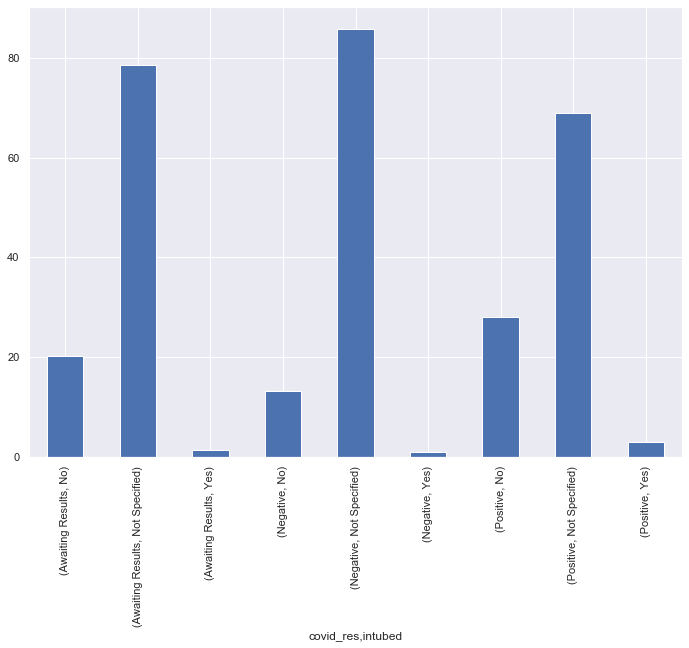

In [180]:
intubed = covid_df.groupby(["covid_res", "intubed"])["id"].count()
res1 = covid_df['covid_res'].value_counts()
(intubed.div(res1, level='covid_res') * 100).plot(kind='bar')


<Figure size 504x504 with 0 Axes>

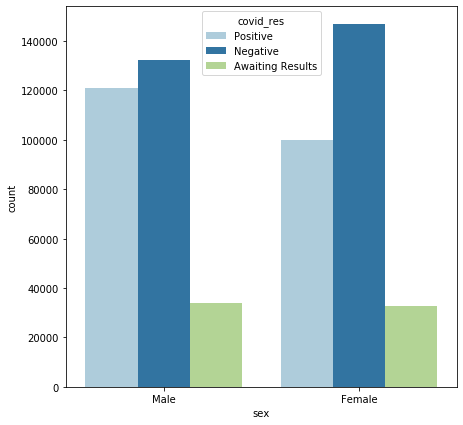

In [200]:
#now lets see the number of males and females wrt to covid results
plt.figure(figsize=(7,7))
ax = sns.countplot(covid_df['sex'],hue=df['covid_res'])


<Figure size 576x576 with 0 Axes>

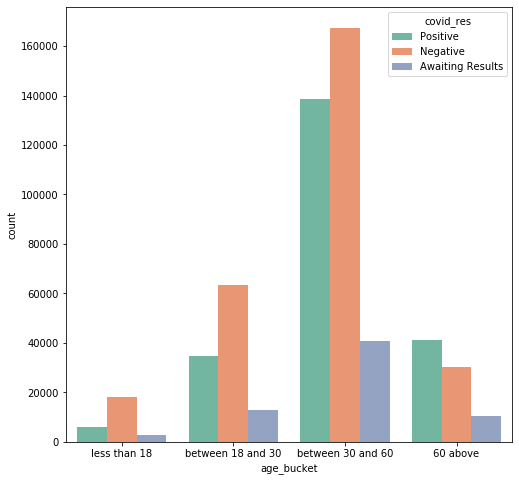

In [112]:
#now lets see the age group of patients wrt to covid results
plt.figure(figsize=(8,8))
sns.countplot(covid_df['age_bucket'],hue=covid_df['covid_res'], order=["less than 18", "between 18 and 30", "between 30 and 60", "60 above"])

In [ ]:
train_data,test_data = train_test_split(log_data,test_size=0.2)
model = smf.glm(data = train_data,
                   formula = formula,
                   family=sm.families.Binomial())
result = model.fit()
print(result.summary())